# EDA on Students Performance in Exams data




In [ ]:
# Extra step to download a csv file in google colab:

from google.colab import files

uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df= pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Insights or Observation

There is no missing values

In [ ]:
# To check for duplicate values.

df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df.duplicated().sum()

# It means there are no duplicate records

0

In [ ]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


NOTE: object data type means strings will be values as in that column feature

**Checking the number of unique values in each column**

In [ ]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Segregate categorical and numerical features separately**

In [ ]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
 # list comprehension

[feature for feature in df.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [ ]:
[feature for feature in df.columns if df[feature].dtype != 'O']

['math score', 'reading score', 'writing score']

In [ ]:
 # Segregate both types of features separately:

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']        # 'O' means object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [ ]:
numerical_features

['math score', 'reading score', 'writing score']

In [ ]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [ ]:
# Aggregate the total score by mean.

In [ ]:
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score'])

df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


**EXPLORING MORE VISUALIZATION:**

<Axes: xlabel='average', ylabel='Count'>

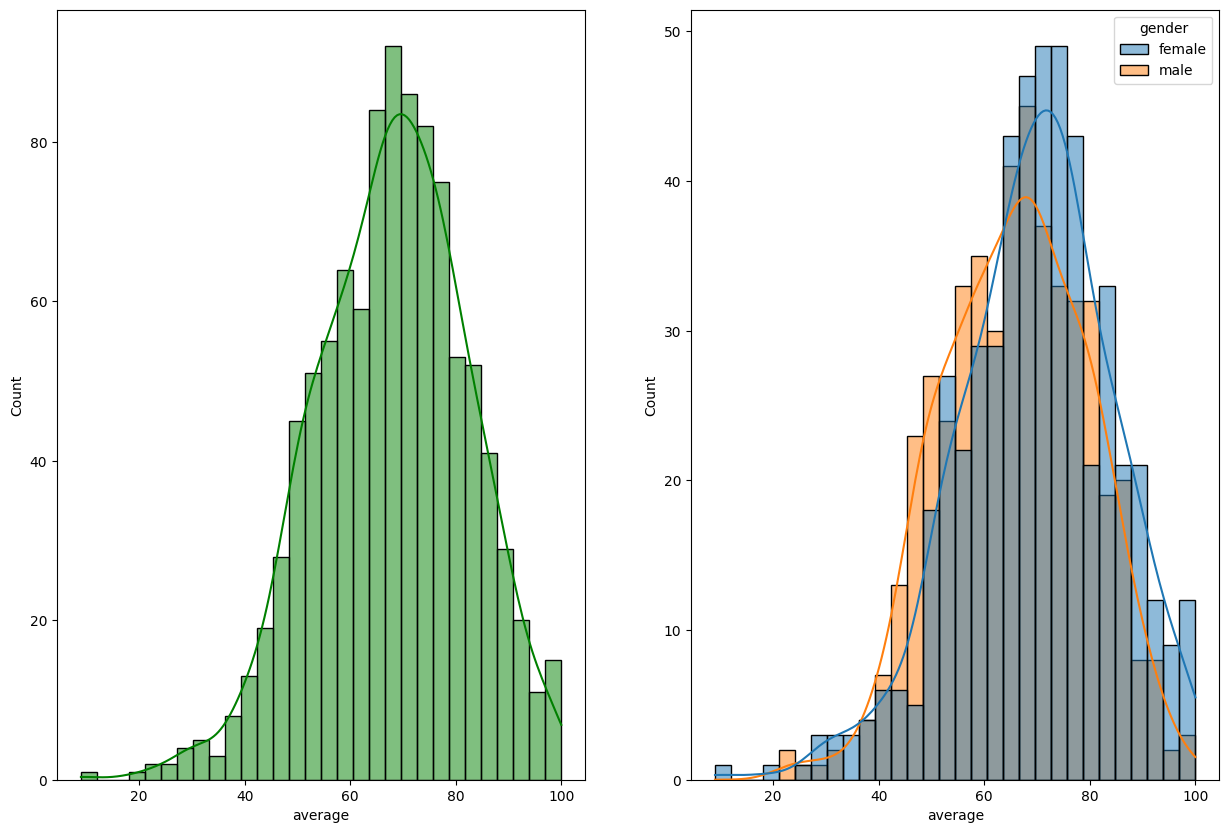

In [ ]:
fig, axis = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
sns.histplot(data= df, x= 'average', bins= 30, kde= True, color= 'g')
plt.subplot(122)
sns.histplot(data= df, x= 'average', bins= 30, kde= True, hue= 'gender')

INSIGHTS:

1. Female students tend to perform well than male students

<Axes: xlabel='average', ylabel='Count'>

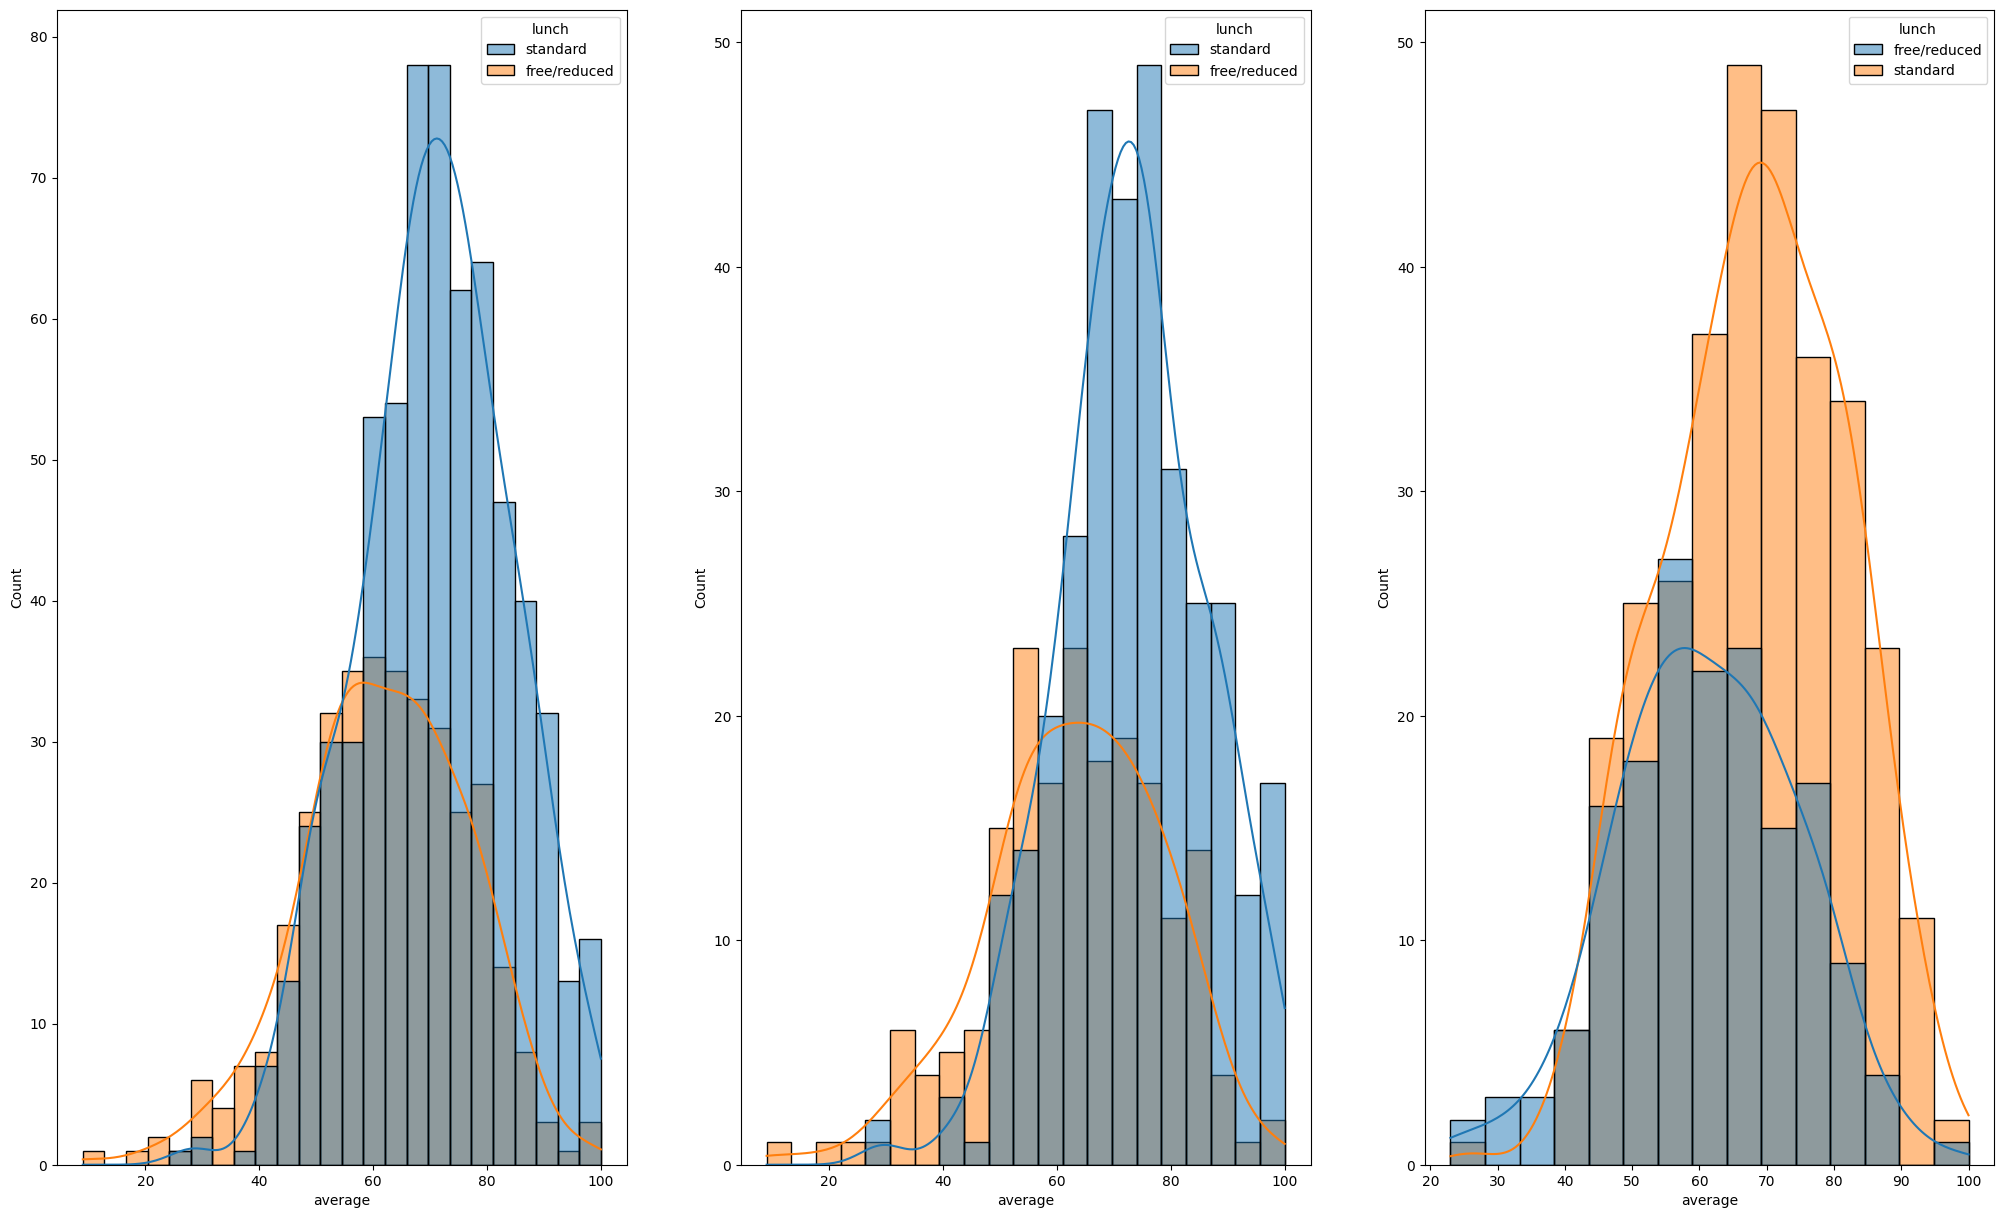

In [ ]:
fig, axis = plt.subplots(1,3, figsize= (25,15))
plt.subplot(131)
sns.histplot(data= df, x = 'average', kde= True, hue= 'lunch')

plt.subplot(132)
sns.histplot(data= df[df.gender == 'female'], x= 'average', kde= True, hue='lunch')

plt.subplot(133)
sns.histplot(data= df[df.gender == 'male'], x= 'average', kde= True, hue='lunch')


INSIGHTS:

Standard lunch help students perform well in exams.

Standard lunch help students well in exam , be it for male or female.

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average'],
      dtype='object')

<Axes: xlabel='average', ylabel='Count'>

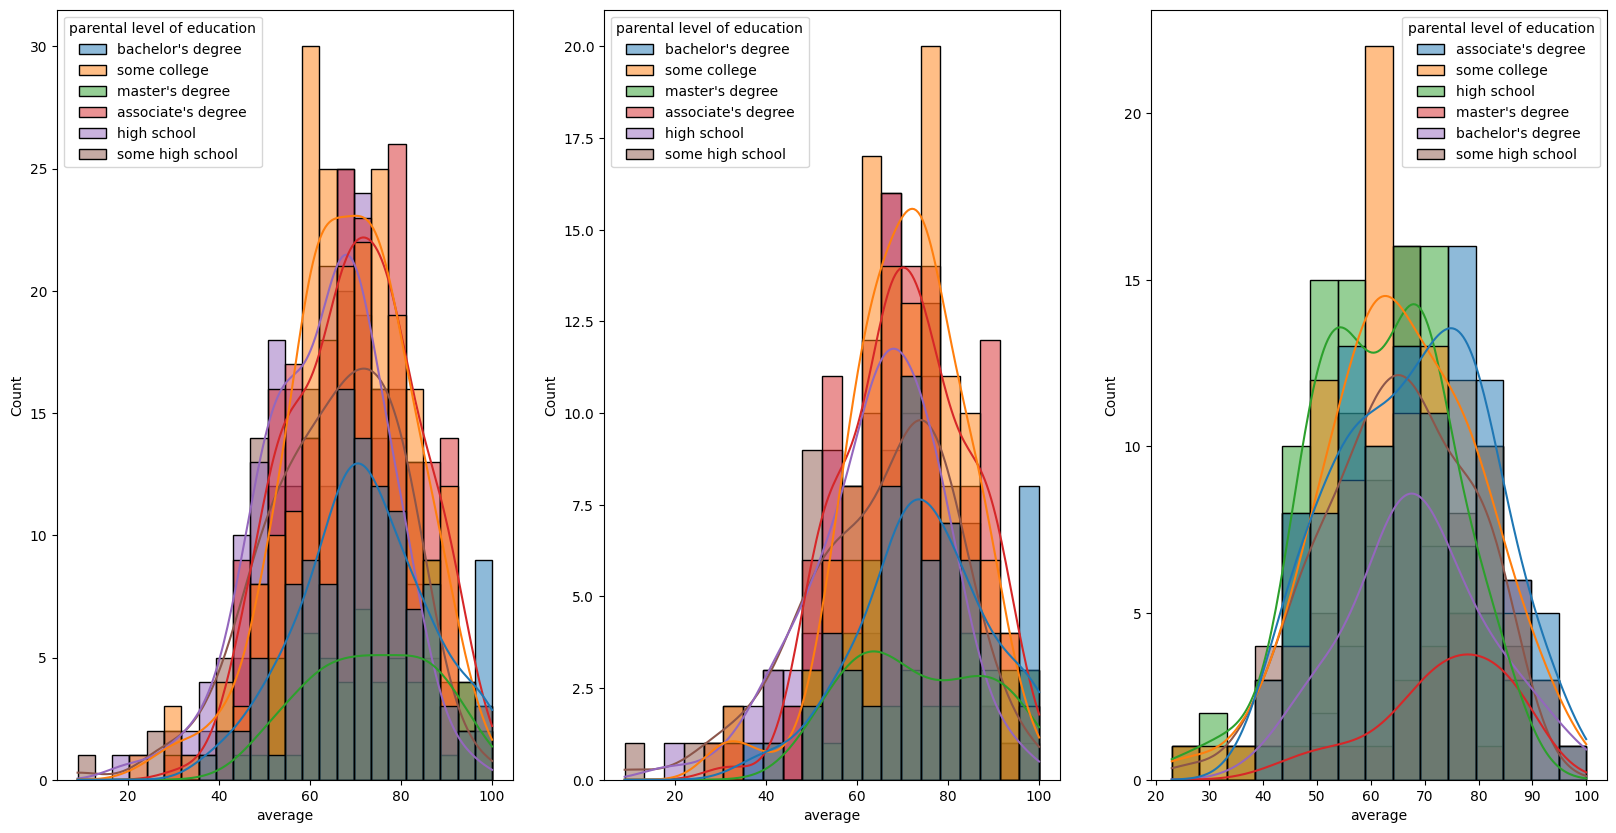

In [ ]:
fig, axis = plt.subplots(1,3, figsize= (20,10))
plt.subplot(131)
sns.histplot(data= df, x = 'average', kde= True, hue= 'parental level of education')

plt.subplot(132)
sns.histplot(data= df[df.gender == 'female'], x= 'average', kde= True, hue='parental level of education')

plt.subplot(133)
sns.histplot(data= df[df.gender == 'male'], x= 'average', kde= True, hue='parental level of education')


In [ ]:
# In first and second the curve was similar, tend to centre.
# In third graph, the master(red) and assosicate(blue) tend to shift right from centre, left skewed.

INSIGHTS:

In general, parental education doesn't impact student's perform well in exam.

Second plot also shows that, in case of female students, there is no parental impact in students' performance in exam.

Third plot shows that, in case of male students, parents whose education is associate and masters degree, male child tend to perform well in exam.

<Axes: xlabel='average', ylabel='Count'>

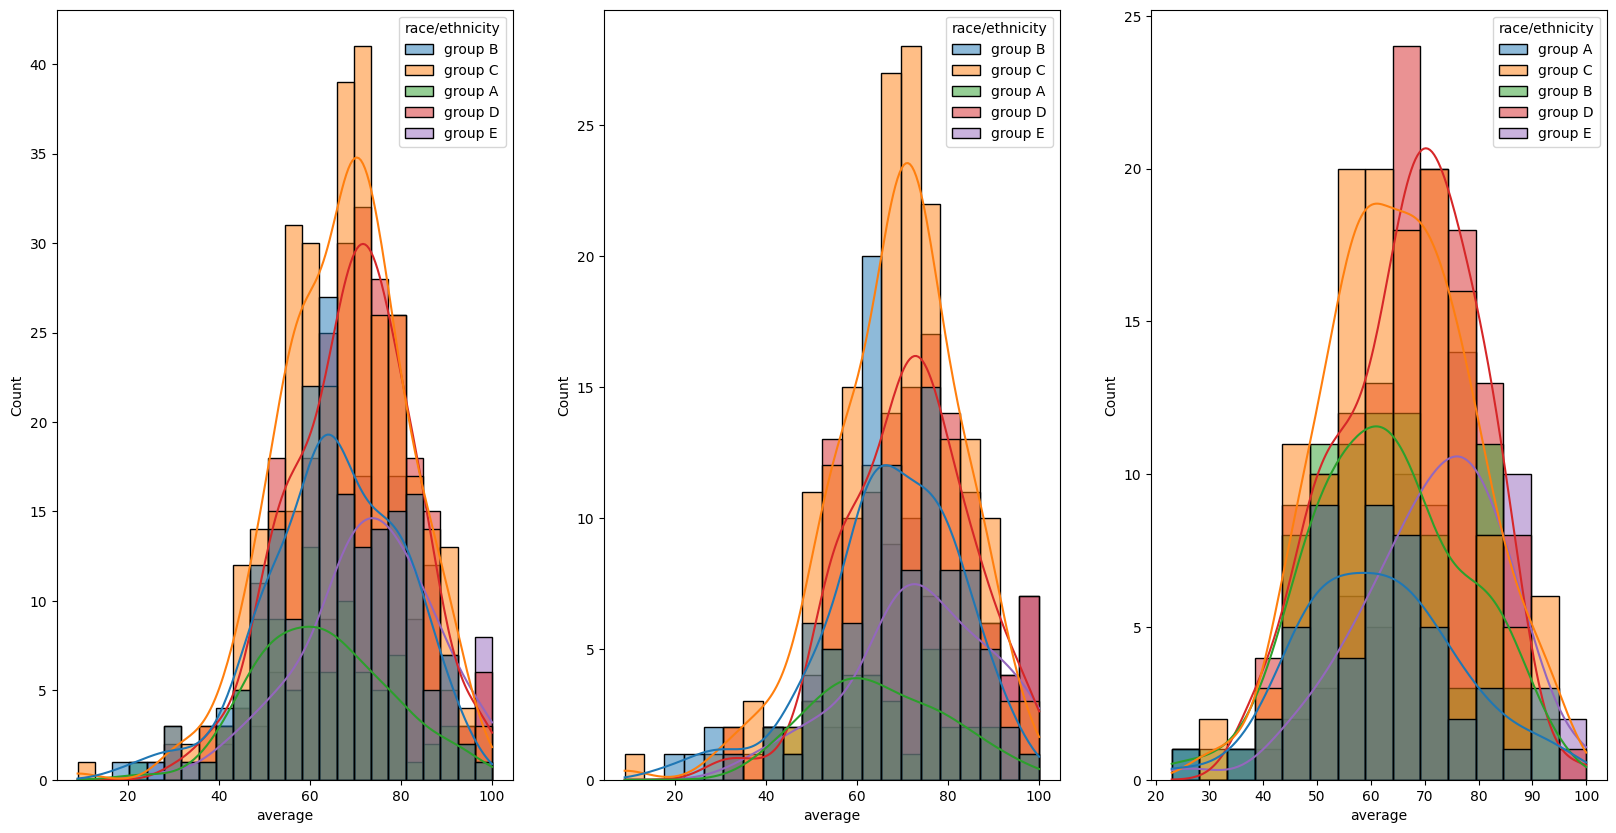

In [ ]:
fig, axis = plt.subplots(1,3, figsize= (20,10))
plt.subplot(131)
sns.histplot(data= df, x = 'average', kde= True, hue= 'race/ethnicity')

plt.subplot(132)
sns.histplot(data= df[df.gender == 'female'], x= 'average', kde= True, hue='race/ethnicity')

plt.subplot(133)
sns.histplot(data= df[df.gender == 'male'], x= 'average', kde= True, hue='race/ethnicity')


INSIGHTS:

Generally, the students of groupA and groupB tends to perform poorly in exam.

Students of groupA and groupB tend to perform poorly, irrespective of whether they are male or female.

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average'],
      dtype='object')

In [ ]:
new_numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
new_numerical_features

['math score', 'reading score', 'writing score', 'total_score', 'average']

<Axes: >

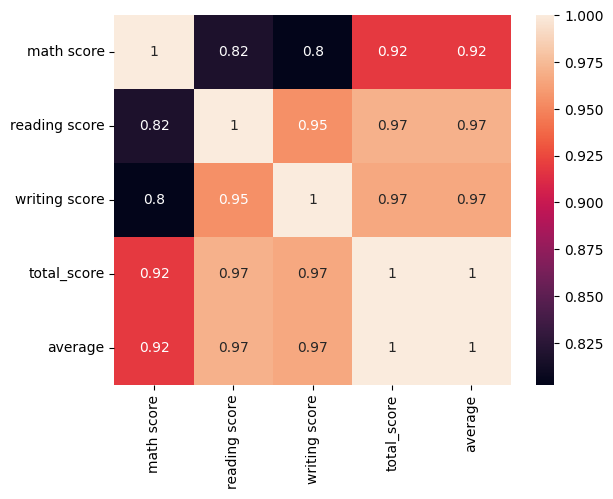

In [ ]:
# sns.heatmap(df[new_numerical_features].corr(), annot= True)           // this is what sir wrote but it was throwing error, so I pass only numerical features.

sns.heatmap(df[new_numerical_features].corr(), annot= True)             # this is written by me but is giving same output as sir's.